Dataset link : *https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/refs/heads/main/world_population.csv*

#Extended Exploratory Data Analysis (EDA) Task List🤖


# ***Step 1: Understand the Dataset***

* Load the dataset and display the first 10 rows.

* List all the columns and their data types.

* Count the total number of rows and columns.

* Identify which columns contain missing values.

* Check for unique values in categorical columns.

* Determine how many duplicate rows exist.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
# Load the dataset and display the first 10 rows.
df=pd.read_csv('https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/refs/heads/main/world_population.csv')
df.head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987.0,33428485.0,28127721.0,23364185.0,16394062.0,11828638.0,8330047.0,6029700.0,1246700.0,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857.0,15585.0,14525.0,13172.0,11047.0,8316.0,6560.0,6283.0,91.0,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763.0,92664.0,89941.0,85695.0,75055.0,63328.0,64888.0,64516.0,442.0,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318.0,45036032.0,43257065.0,41100123.0,37070774.0,32637657.0,28024803.0,23842803.0,2780400.0,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469.0,2805608.0,2878595.0,2946293.0,3168523.0,3556539.0,3135123.0,2534377.0,29743.0,93.4831,0.9962,0.03


In [45]:
# List all the columns and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [46]:
# Count the total number of rows and columns.
df.shape


(234, 17)

In [47]:
# Identify which columns contain missing values.
df.isnull().sum()

,0
Rank,0
CCA3,0
Country,0
Capital,0
Continent,0
2022 Population,4
2020 Population,1
2015 Population,4
2010 Population,7
2000 Population,7


In [48]:
# Check for unique values in categorical columns.
df.nunique()

,0
Rank,234
CCA3,234
Country,234
Capital,234
Continent,6
2022 Population,230
2020 Population,233
2015 Population,230
2010 Population,227
2000 Population,227


In [49]:
# Determine how many duplicate rows exist.
df.duplicated().sum()

np.int64(0)

# **Step 2: Data Cleaning**

* Remove any duplicate rows.

* Fill missing numeric values with mean or median.

* Fill missing categorical values with mode or a placeholder like " Unknown ".

* Convert date columns to datetime format and extract features like month, year, day, weekday.

* Standardize categorical values (remove extra spaces, fix capitalization).

In [50]:
# Remove any duplicate rows.
df.drop_duplicates(inplace=True)
df.shape

(234, 17)

In [51]:
# Fill missing numeric values with mean or median.

# Select only the columns with numeric data types
numeric_cols = df.select_dtypes(include=np.number).columns

# Fill missing values in those columns with their respective means
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [52]:
df.head(2)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04


In [53]:
df.isna().sum()

,0
Rank,0
CCA3,0
Country,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0


In [54]:
# Fill missing categorical values with mode or a placeholder like "Unknown".

# Select columns with 'object' dtype
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Fill missing values in those columns with the placeholder "Unknown"
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [55]:
df.isna().sum()

,0
Rank,0
CCA3,0
Country,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0


In [56]:
# Convert date columns to datetime format and extract features like month, year, day, weekday.
#There is no date col in this data set----Arigato

In [57]:
# Standardize categorical values (remove extra spaces, fix capitalization).


# List of categorical columns to clean
categorical_cols = ['CCA3', 'Country', 'Capital', 'Continent']

# Function to clean text: remove spaces + title case
for col in categorical_cols:
    df[col] = df[col].astype(str)       # Ensure column is string
    df[col] = df[col].str.strip()       # Remove extra spaces
    df[col] = df[col].str.title()       # Capitalize first word

In [58]:
df.head(4)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afg,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,Alb,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,Dza,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,Asm,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00


Step 3: Basic Statistics

* Calculate mean, median, mode, and standard deviation for numeric columns.

* Identify which column has the highest variance.

* Find the minimum and maximum values for each numeric column.

* Count frequency of values in categorical columns.

* Check for skewness and kurtosis in numeric columns.

In [59]:
# Calculate mean, median, mode, and standard deviation for numeric columns.
"""
df[numeric_cols].mean()    # Mean
df[numeric_cols].median()  # Median
df[numeric_cols].mode()    #Mode
df[numeric_cols].std()     #Standard Deviation
"""

'\ndf[numeric_cols].mean()    # Mean\ndf[numeric_cols].median()  # Median\ndf[numeric_cols].mode()    #Mode\ndf[numeric_cols].std()     #Standard Deviation\n'

In [60]:
# Identify which column has the highest variance.

# Calculate the variance for all numeric columns in the DataFrame.

# The result is a Series where the index is the column name and the value is its variance.
column_variances = df.var(numeric_only=True)


# 'idxmax()' returns the index (column name) corresponding to the highest variance value.
column_with_max_variance = column_variances.idxmax()
#df[column_with_max_variance]

print(f"The column with the highest variance is: '{column_with_max_variance}'")


The column with the highest variance is: '2022 Population'


In [61]:
# Find the minimum and maximum values for each numeric column.

"""
df[numeric_cols].max()
df[numeric_cols].min()
"""

'\ndf[numeric_cols].max()\ndf[numeric_cols].min()\n'

In [62]:
# Count frequency of values in categorical columns.

# Select columns with 'object' or 'category' data types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Loop through the list of categorical columns
for col in categorical_cols:
    print(f"--- Frequency Count for Column: {col} ---")
    print(df[col].value_counts())
    print("\n" + "="*40 + "\n")  # Separator for readability

--- Frequency Count for Column: CCA3 ---
CCA3
Afg    1
Alb    1
Dza    1
Asm    1
And    1
      ..
Wlf    1
Esh    1
Yem    1
Zmb    1
Zwe    1
Name: count, Length: 234, dtype: int64


--- Frequency Count for Column: Country ---
Country
Afghanistan          1
Albania              1
Algeria              1
American Samoa       1
Andorra              1
                    ..
Wallis And Futuna    1
Western Sahara       1
Yemen                1
Zambia               1
Zimbabwe             1
Name: count, Length: 234, dtype: int64


--- Frequency Count for Column: Capital ---
Capital
Kabul               1
Tirana              1
Algiers             1
Pago Pago           1
Andorra La Vella    1
                   ..
Mata-Utu            1
El Aaiún            1
Sanaa               1
Lusaka              1
Harare              1
Name: count, Length: 234, dtype: int64


--- Frequency Count for Column: Continent ---
Continent
Africa           57
Asia             50
Europe           50
North America    

In [63]:


# Check skewness of all numeric columns
# Skewness measures the asymmetry of the distribution of values.
# A skewness near 0 indicates a roughly symmetric distribution.
skewness = df.skew(numeric_only=True)
#print("Skewness of numeric columns:\n", skewness, "\n")
skewness
# Check kurtosis of all numeric columns
# Kurtosis measures the "tailedness" of the distribution.
# A kurtosis of 3 corresponds to a normal distribution (mesokurtic).
# Values >3 indicate heavy tails (leptokurtic), <3 indicate light tails (platykurtic).
kurtosis = df.kurtosis(numeric_only=True)
#print("Kurtosis of numeric columns:\n", kurtosis)
kurtosis

,0
Rank,-1.200000
2022 Population,90.493242
2020 Population,90.956065
2015 Population,91.878951
2010 Population,92.816220
2000 Population,95.856843
1990 Population,171.653130
1980 Population,170.741298
1970 Population,103.680994
Area (km²),43.531346


Step 4: Data Visualization

* Plot histograms for all numeric columns to see distributions.

* Create boxplots to identify outliers.

* Make a correlation heatmap and identify the most strongly correlated columns.

* Draw scatter plots between highly correlated numeric columns.

* Create countplots for categorical columns.

* Use pairplot to see relationships between multiple numeric columns.

* Plot trend lines if there is a time-series or date column.


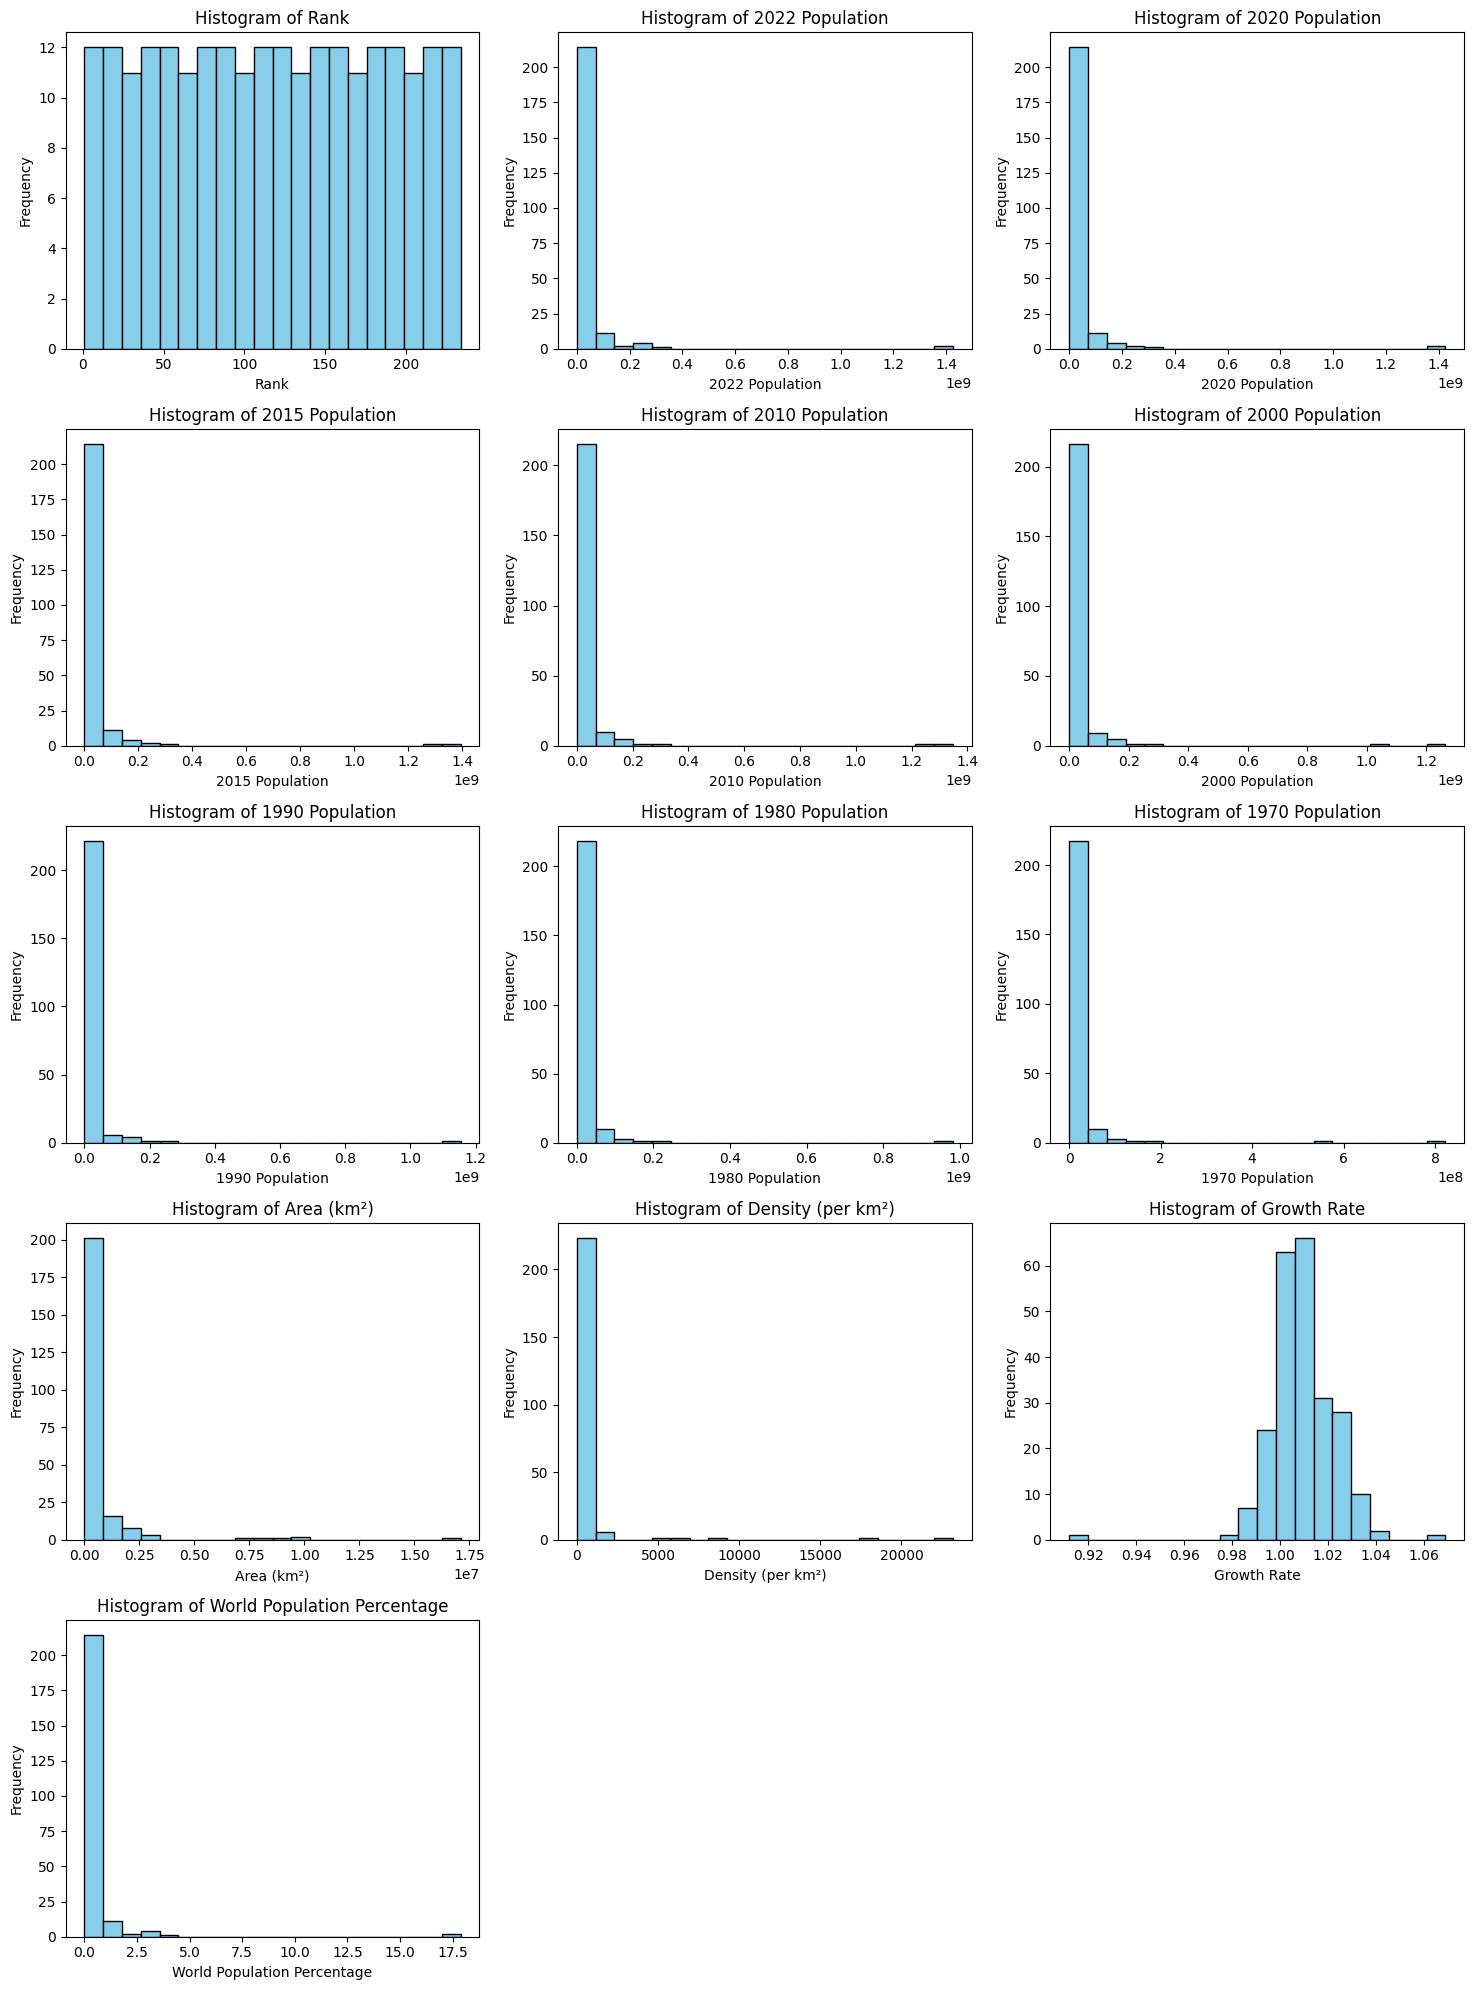

In [64]:
# Plot histograms for all numeric columns to see distributions.

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns


# n_cols determines how many plots per row
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate rows needed
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Loop through each numeric column and plot its histogram
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')  # Drop NaN for clean plotting
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

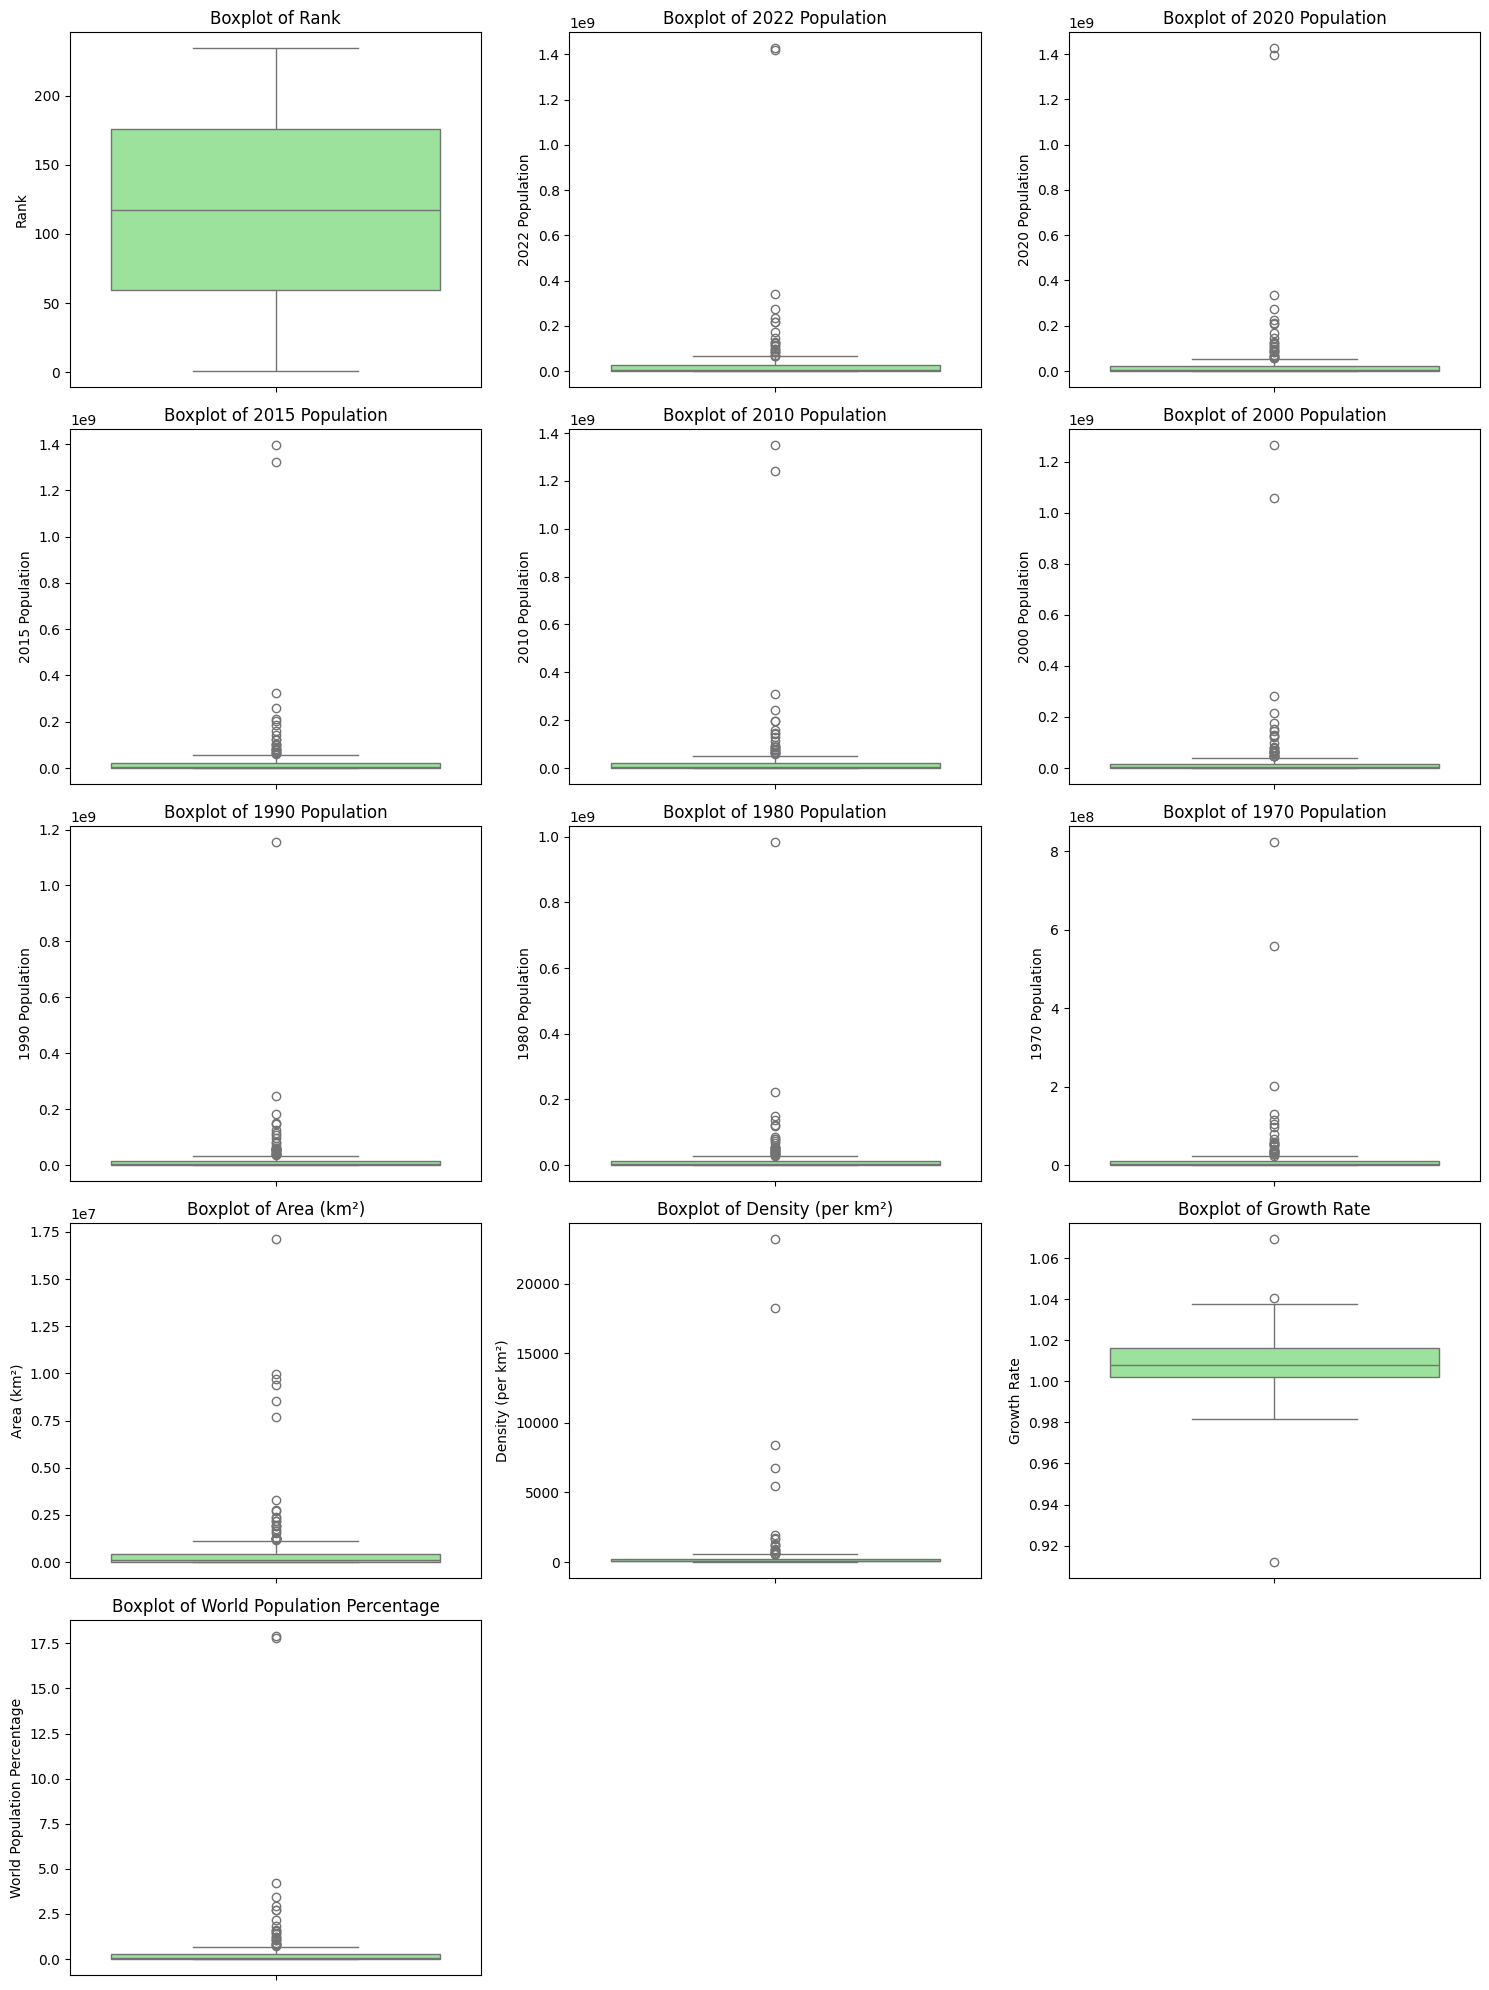

In [65]:
# Create boxplots to identify outliers.

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed
plt.figure(figsize=(5 * n_cols, 4 * n_rows))



for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot
    sns.boxplot(y=df[col], color='lightgreen')  # Boxplot for the column
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

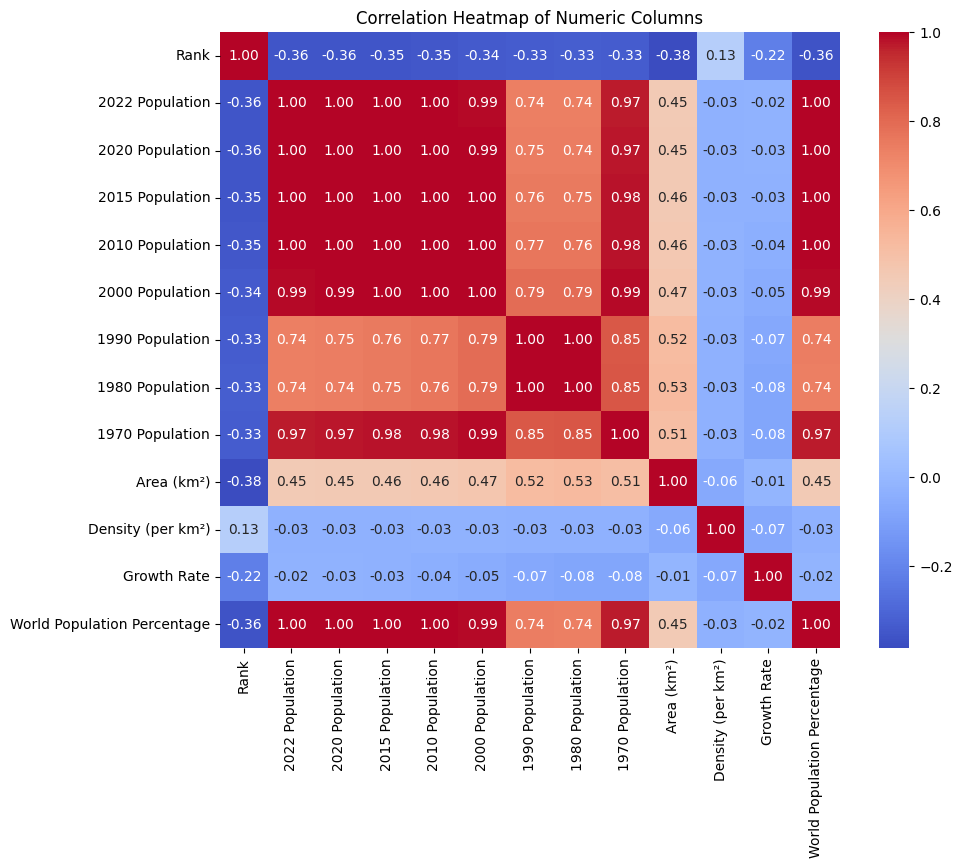

Top 5 strongest correlated column pairs:
 2020 Population              World Population Percentage    0.999879
World Population Percentage  2020 Population                0.999879
                             2022 Population                0.999523
2022 Population              World Population Percentage    0.999523
2020 Population              2015 Population                0.999462
dtype: float64


In [66]:
# Make a correlation heatmap and identify the most strongly correlated columns.

# Compute correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

# Identify the most strongly correlated columns (excluding self-correlation)
# Stack the correlation matrix, reset index, and sort by correlation value
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

# Remove self-correlations (correlation of a column with itself)
strong_corr = corr_pairs[corr_pairs < 1]

# Get the top 5 strongest correlations
top_corr = strong_corr.head(5)
print("Top 5 strongest correlated column pairs:\n", top_corr)

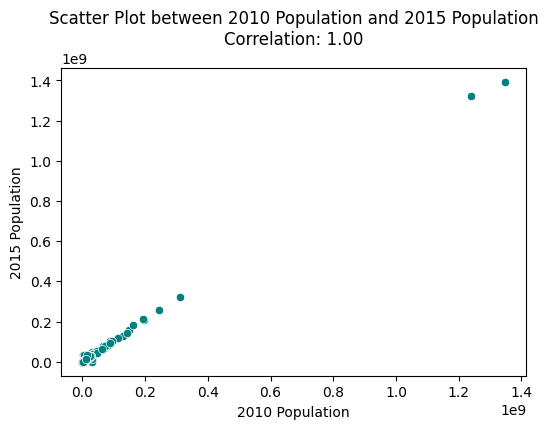

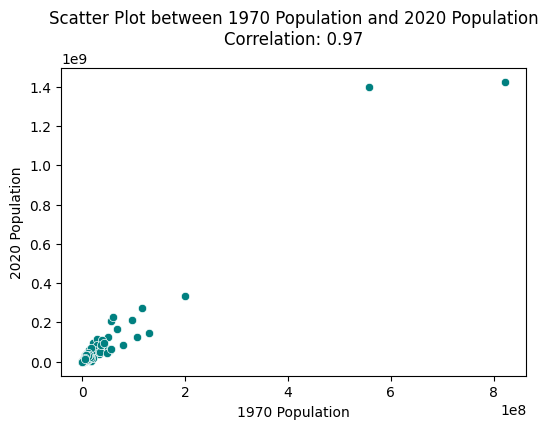

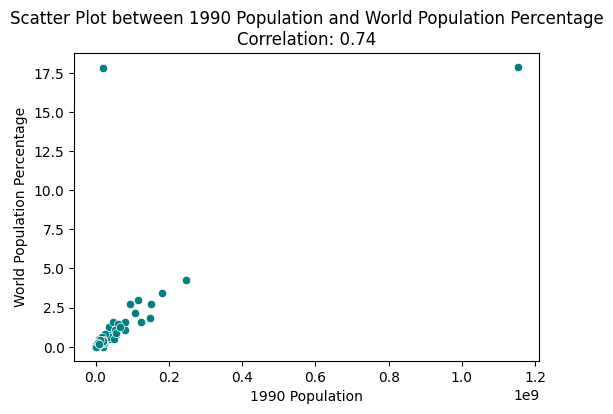

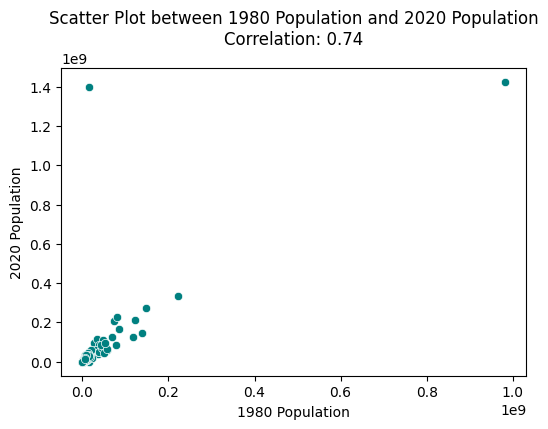

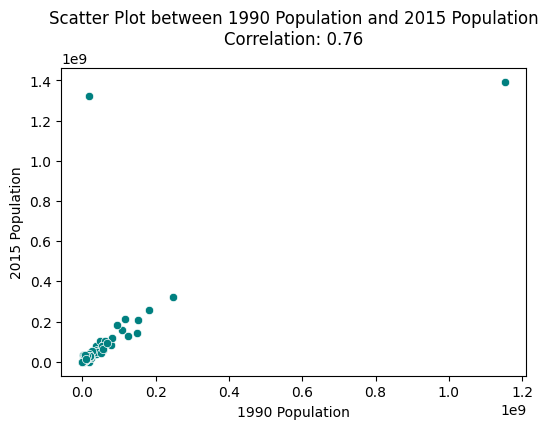

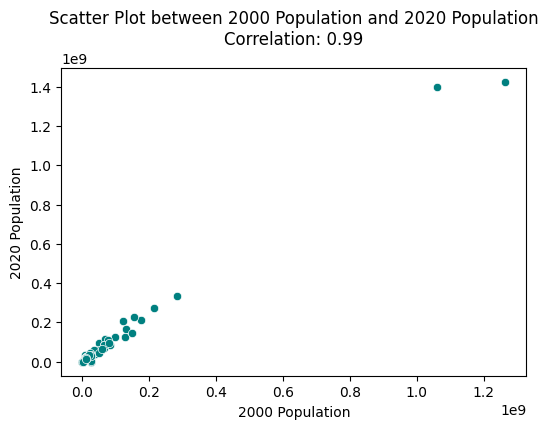

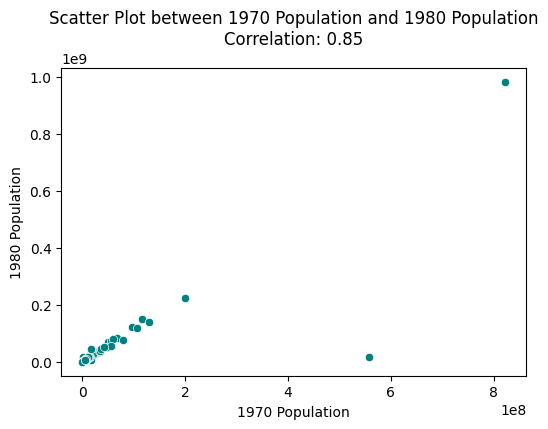

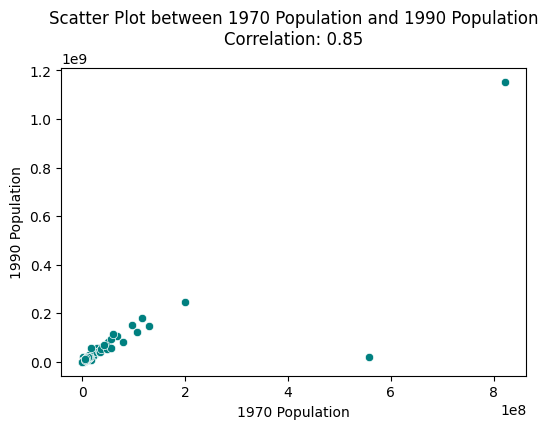

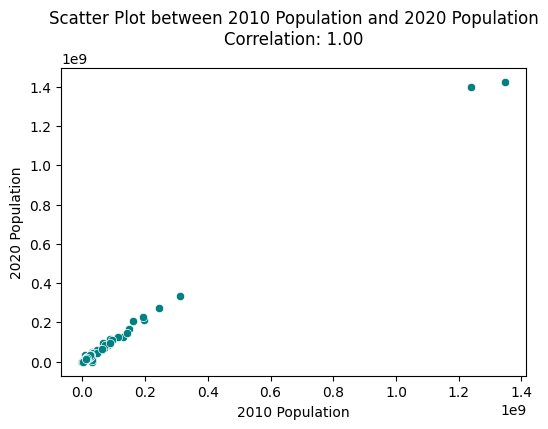

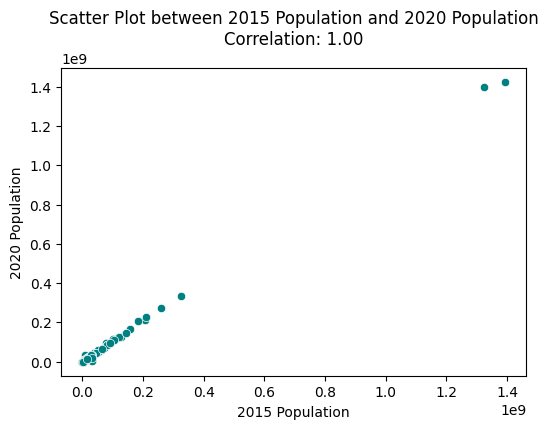

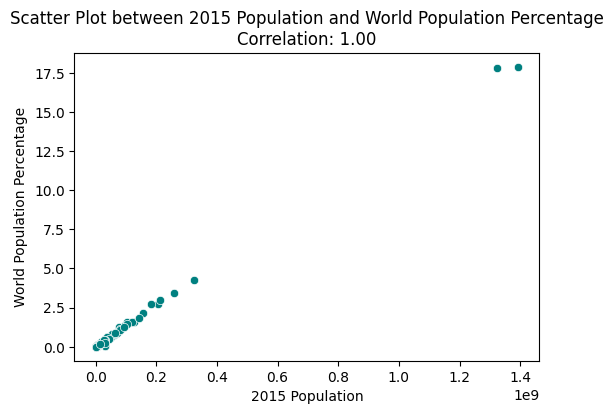

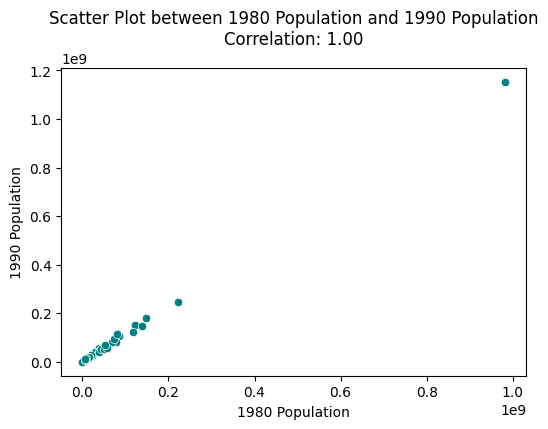

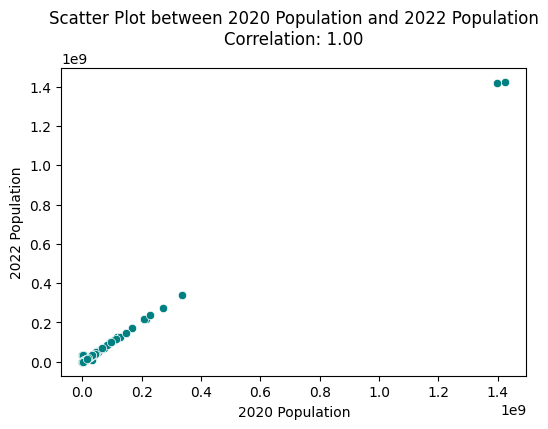

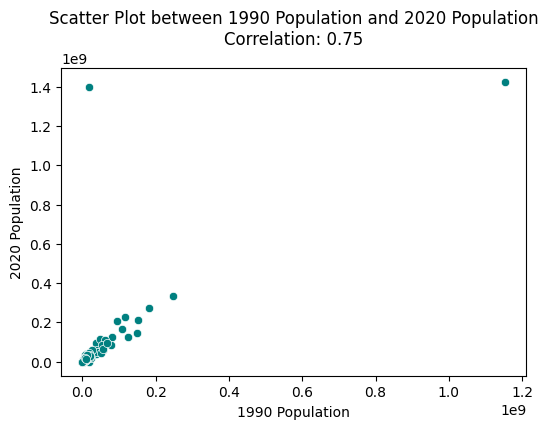

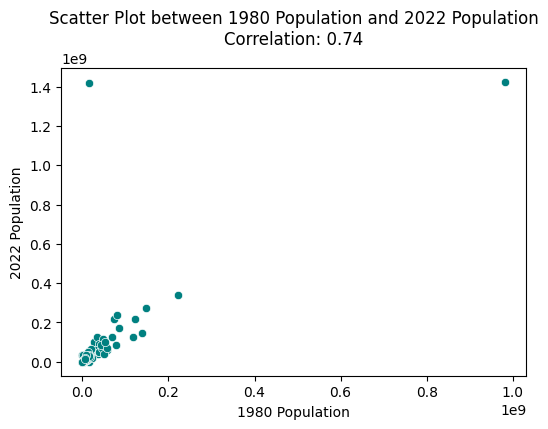

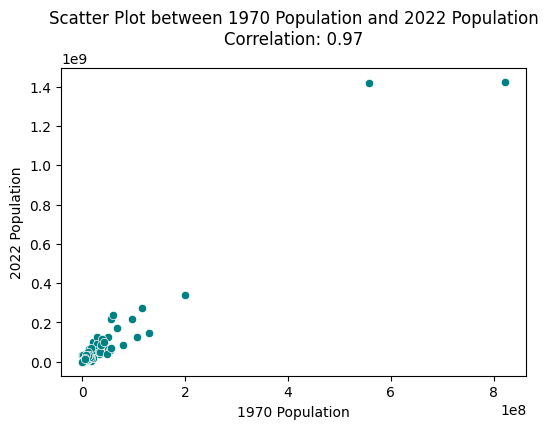

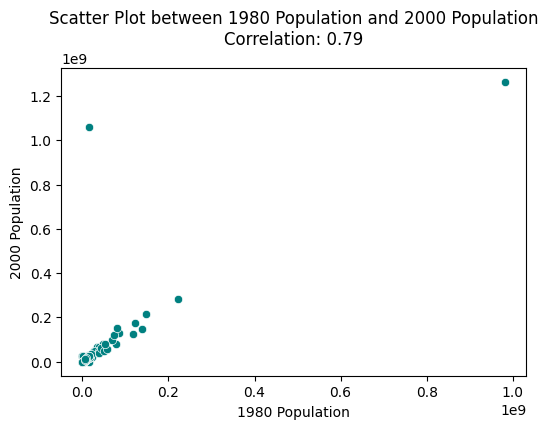

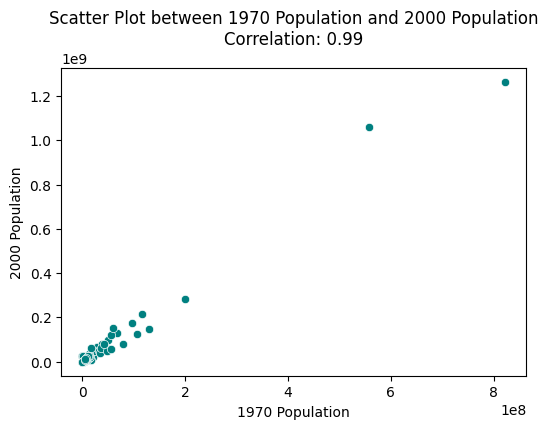

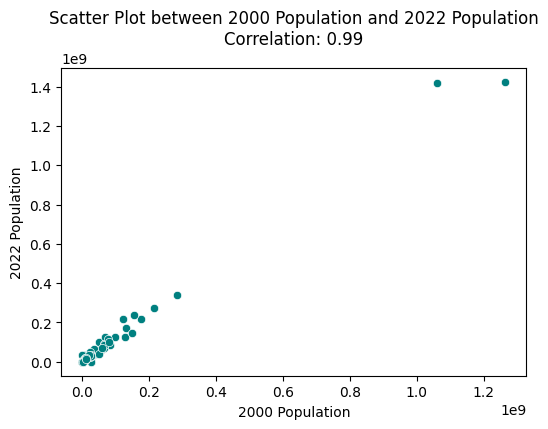

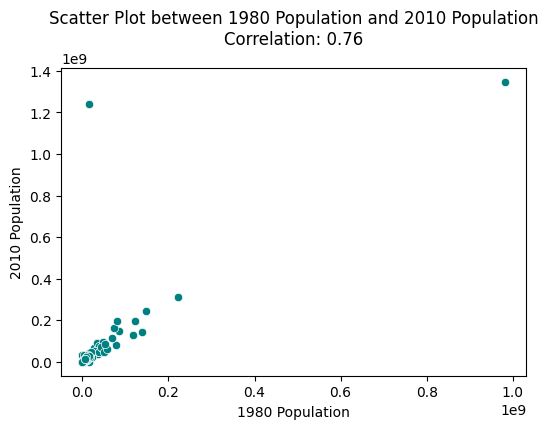

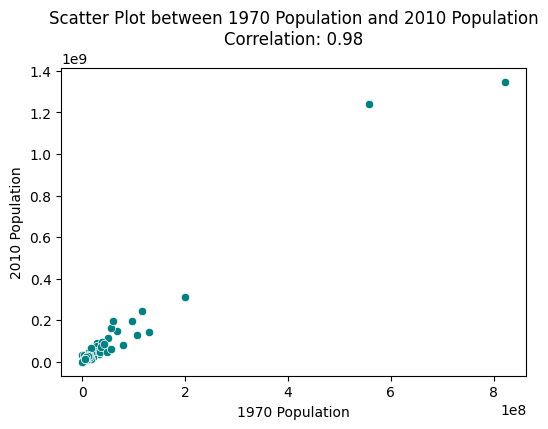

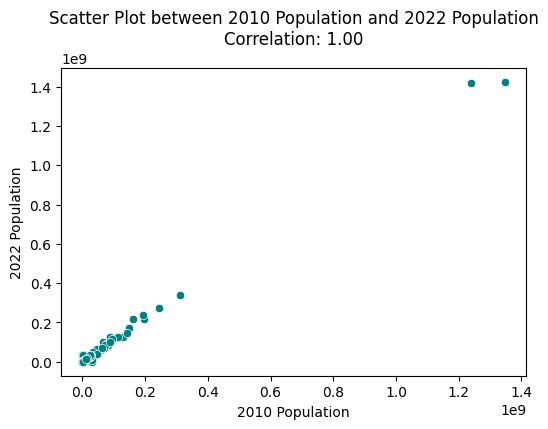

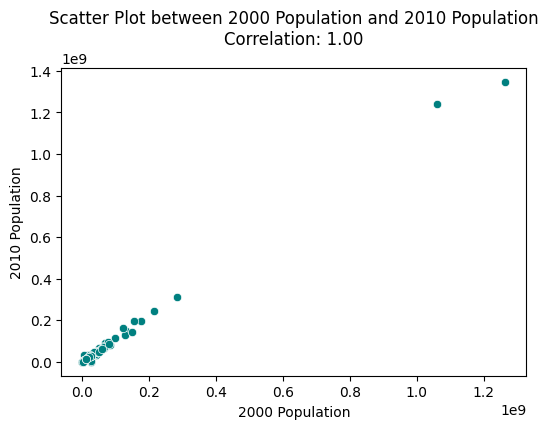

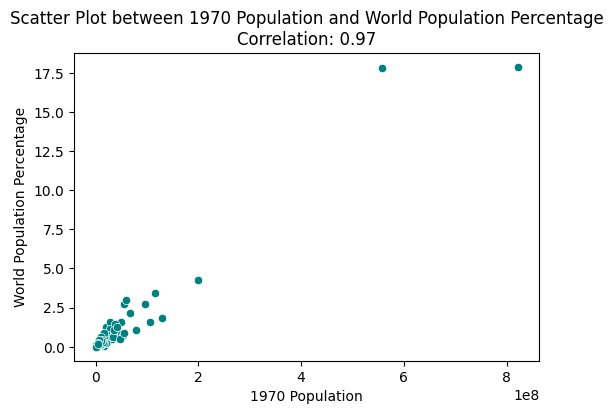

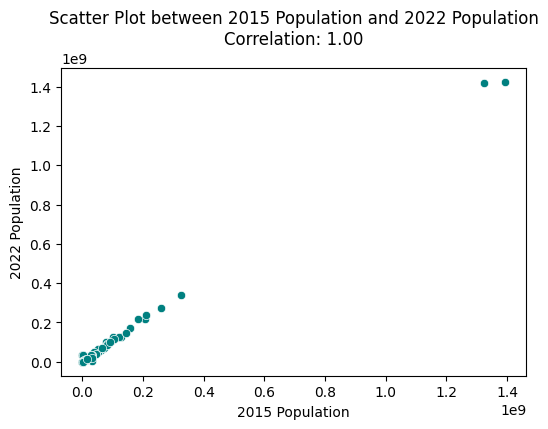

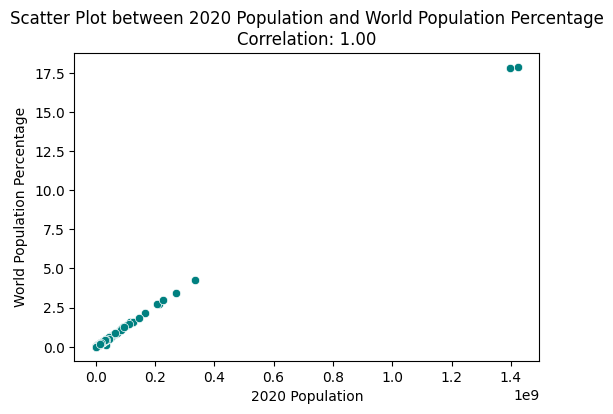

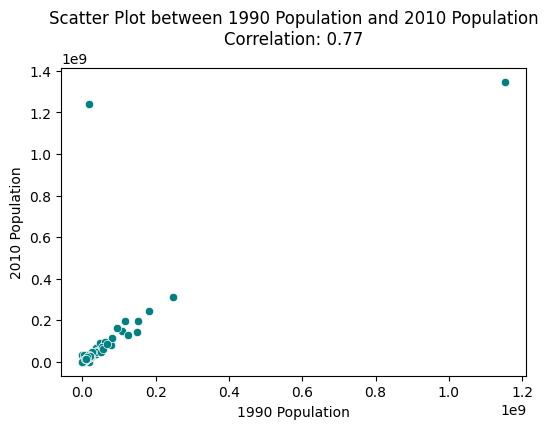

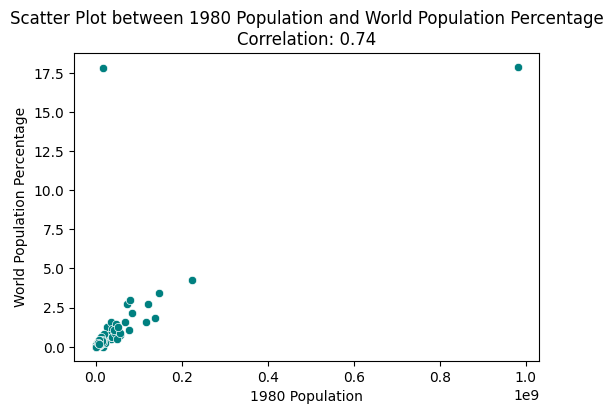

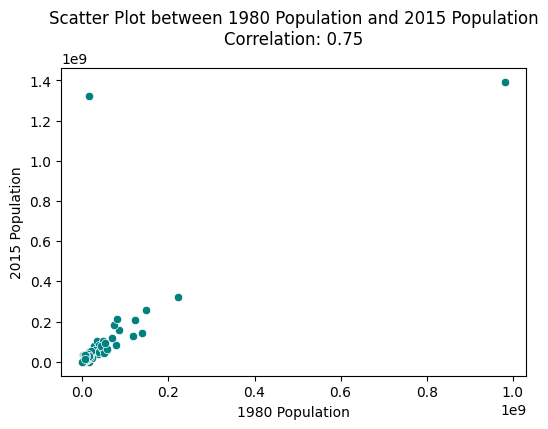

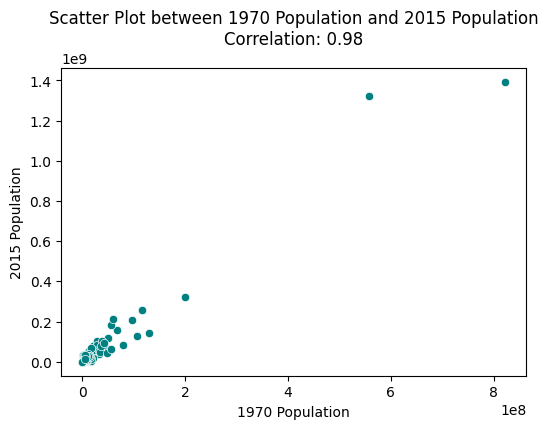

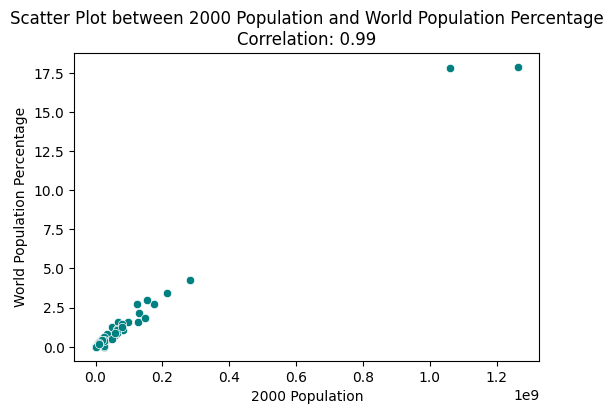

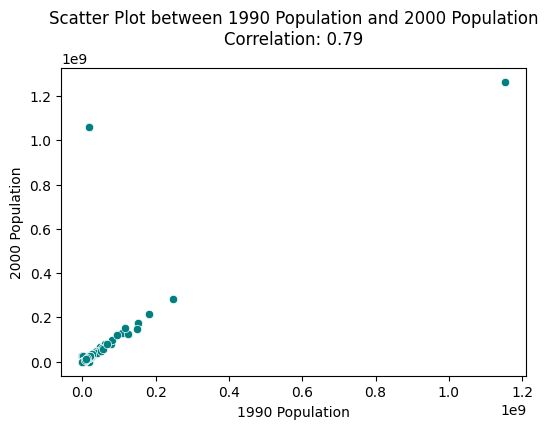

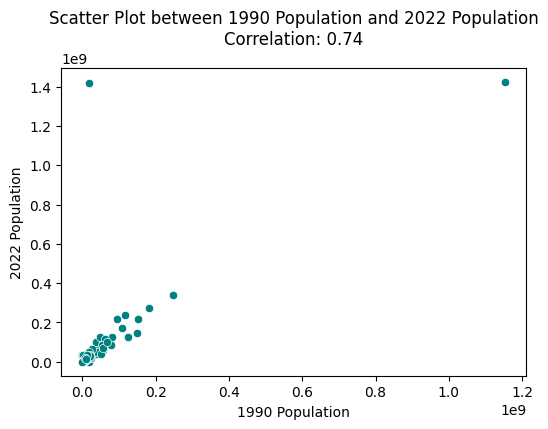

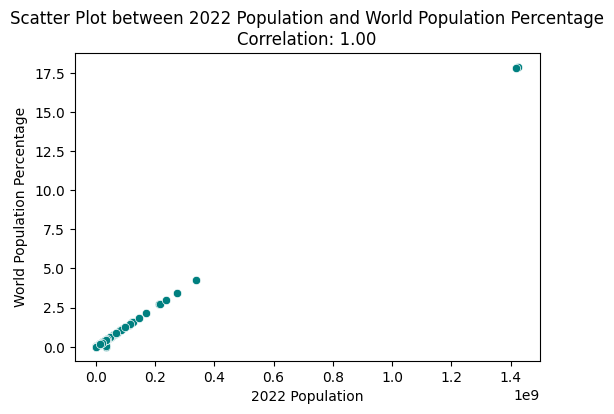

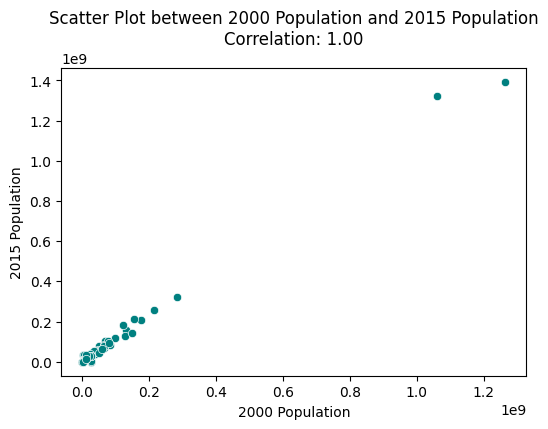

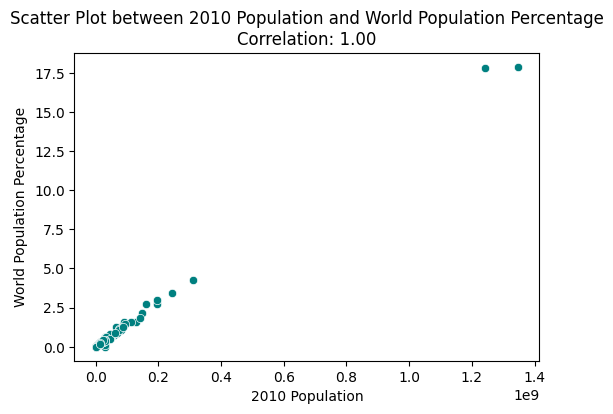

In [67]:
# Draw scatter plots between highly correlated numeric columns.

# Compute correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr().abs()  # Use absolute value to find strong correlations regardless of direction

# Set a threshold to consider a "high" correlation
threshold = 0.7

# Find pairs of columns with correlation above the threshold (excluding self-correlation)
high_corr_pairs = [(col1, col2)
                   for col1 in corr_matrix.columns
                   for col2 in corr_matrix.columns
                   if col1 != col2 and corr_matrix.loc[col1, col2] > threshold]

# Remove duplicate pairs (A,B) and (B,A)
high_corr_pairs = list(set(tuple(sorted(pair)) for pair in high_corr_pairs))

# Plot scatter plots for each highly correlated pair
for col1, col2 in high_corr_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col1], y=df[col2], color='teal')
    plt.title(f'Scatter Plot between {col1} and {col2}\nCorrelation: {corr_matrix.loc[col1, col2]:.2f}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

/tmp/ipython-input-657620919.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel', order=df[col].value_counts().index)
/tmp/ipython-input-657620919.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel', order=df[col].value_counts().index)
/tmp/ipython-input-657620919.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel', order=df[col].value_counts().index)
/tmp/ipython-input-657620919.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is de

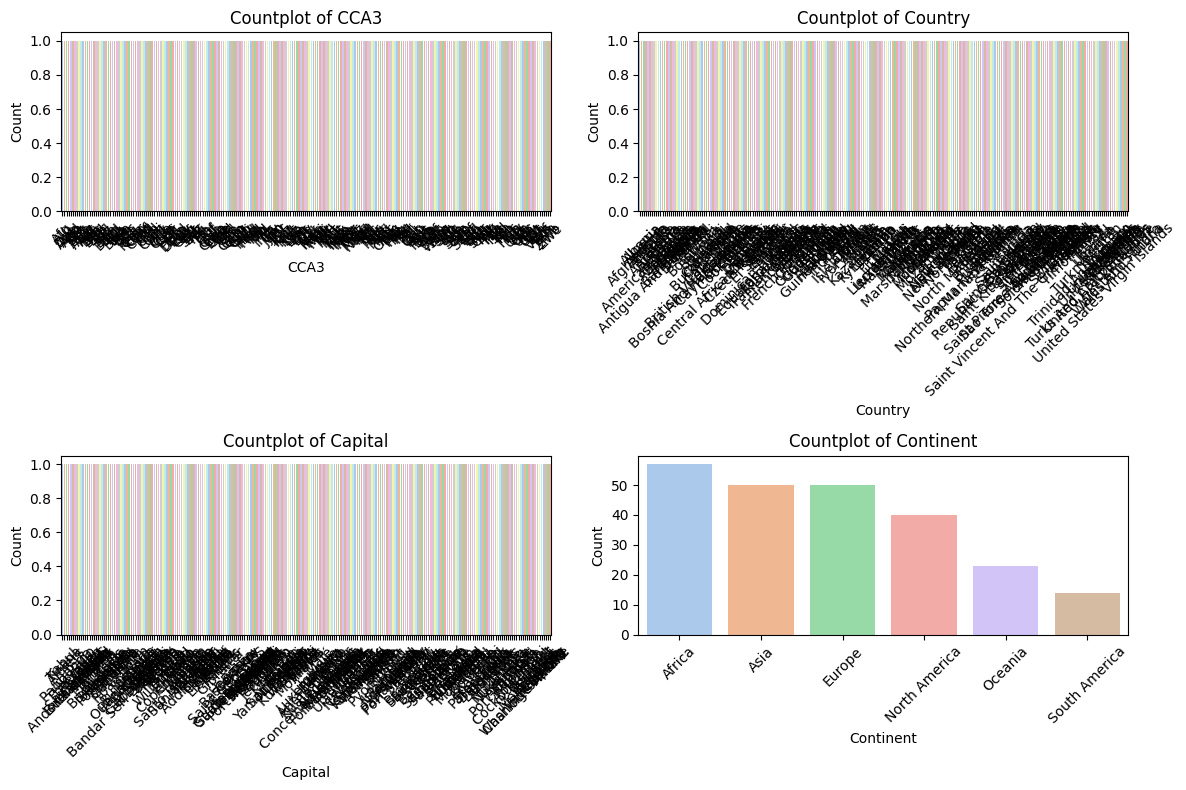

In [68]:
# Create countplots for categorical columns.

categorical_cols = df.select_dtypes(include='object').columns

# Set up the plotting area
n_cols = 2  # Number of plots per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calculate required rows
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

# Loop through each categorical column and plot a countplot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot
    sns.countplot(x=df[col], palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels if needed for readability

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

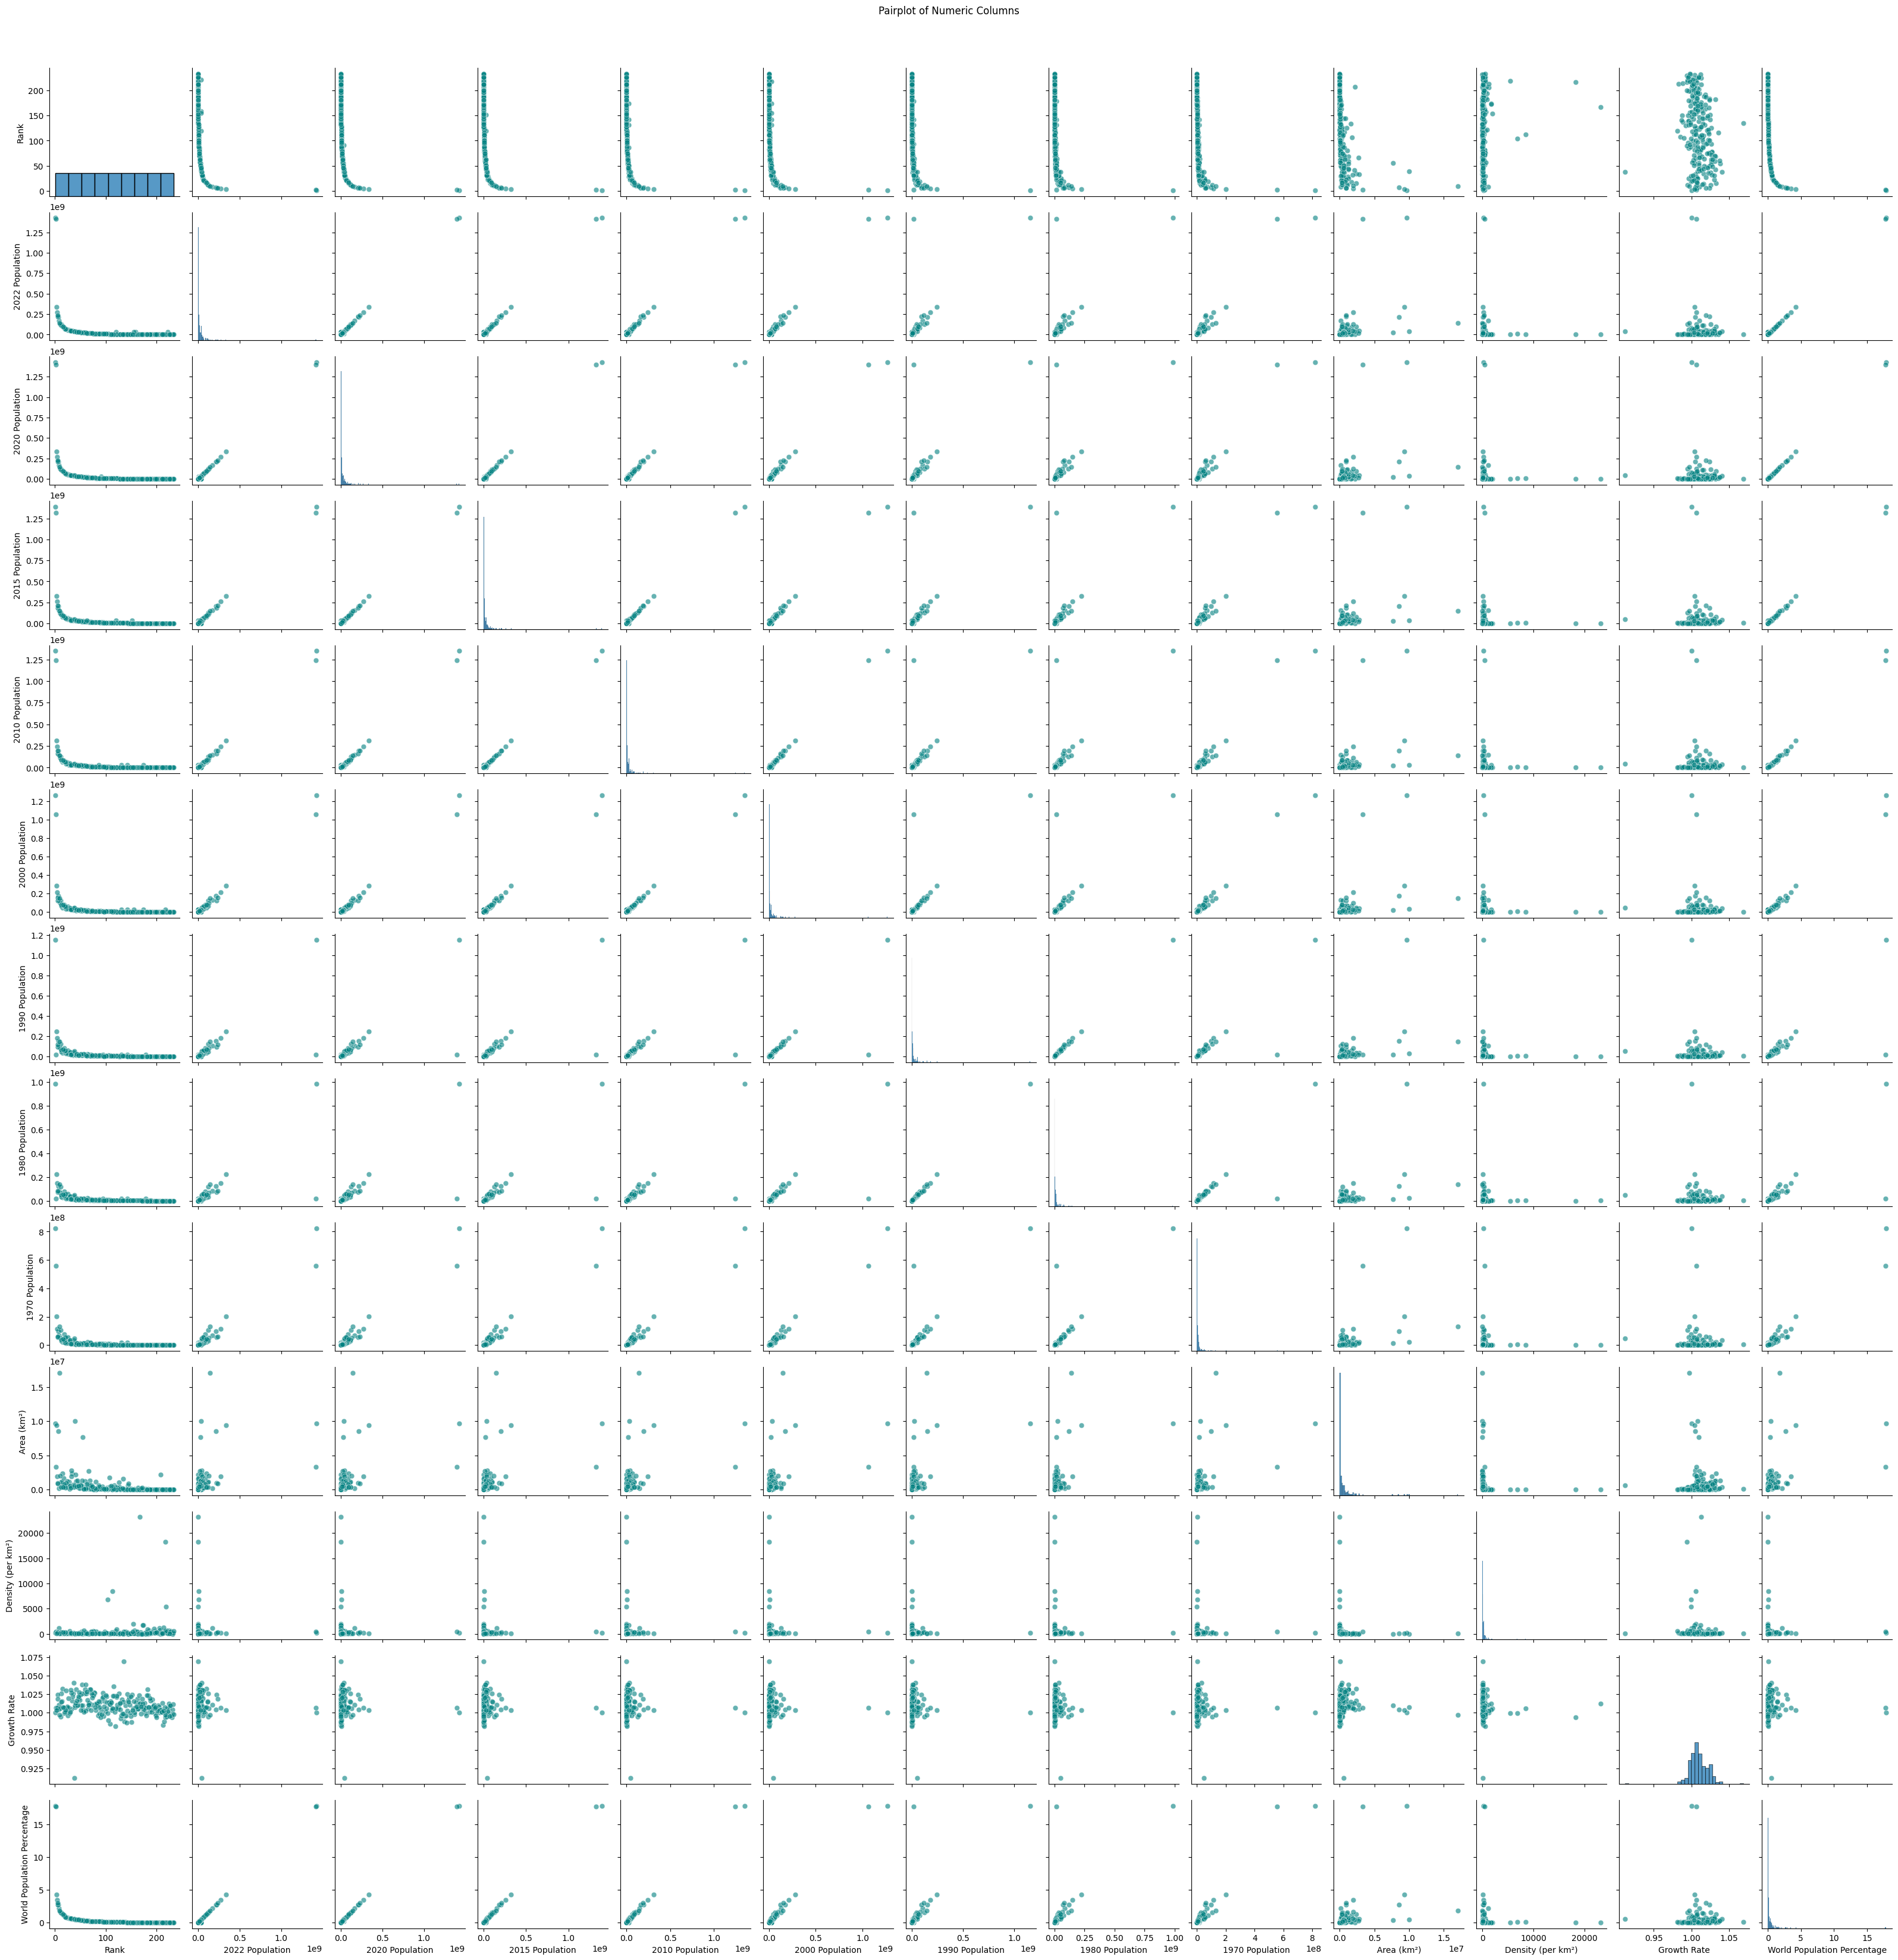

In [69]:
# Use pairplot to see relationships between multiple numeric columns.

# Create a pairplot for all numeric columns
# kind='scatter' will show scatter plots for relationships
# diag_kind='hist' will show histograms on the diagonal
sns.pairplot(df[numeric_cols], kind='scatter', diag_kind='hist', corner=False, plot_kws={'alpha':0.6, 's':40, 'color':'teal'})
plt.suptitle("Pairplot of Numeric Columns", y=1.02)  # Add title above the plots
plt.show()

In [70]:
# Plot trend lines if there is a time-series or date column.
#There is no date col

Step 5: Grouping and Aggregation

* Group the dataset by a categorical column and calculate:

  * Mean

  * Sum

  * Count

* Identify which category has the highest/lowest average in a numeric column.

* Find the top 3 categories with the highest total value of a numeric column.

* Compare multiple groups using bar plots.


In [71]:
df.head(2)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afg,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,Alb,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04


In [72]:
"""
Group the dataset by a categorical column and calculate:

Mean

Sum

Count

"""

# Replace 'category_column' with your categorical column name
# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Group by 'Continent' and calculate mean, sum, and count only for numeric columns
grouped_stats = df.groupby('Continent')[numeric_cols].agg(['mean', 'sum', 'count'])
grouped_stats



Rank             2022 Population                      \
                     mean   sum count            mean           sum count   
Continent                                                                   
Africa          92.157895  5253    57    2.561687e+07  1.460162e+09    57   
Asia            77.560000  3878    50    9.509348e+07  4.754674e+09    50   
Europe         124.500000  6225    50    1.544691e+07  7.723455e+08    50   
North America  160.925000  6437    40    1.500740e+07  6.002961e+08    40   
Oceania        188.521739  4336    23    3.463163e+06  7.965275e+07    23   
South America   97.571429  1366    14    3.120119e+07  4.368166e+08    14   

              2020 Population                     2015 Population  ...  \
                         mean           sum count            mean  ...   
Continent                                                          ...   
Africa           2.387144e+07  1.360672e+09    57    2.198004e+07  ...   
Asia             9.372805e+07  4.686402e+09    50    8.916500e+07  ...   
Europe           1.491584e+07  7.457922e+08    50    1.536823e+07  ...   
North America    1.485591e+07  5.942366e+08    40    1.425960e+07  ...   
Oceania          1.910149e+06  4.393343e+07    23    1.756664e+06  ...   
South America    3.082357e+07  4.315300e+08    14    2.950960e+07  ...   

              Area (km²) Density (per km²)                     Growth Rate  \
                   count              mean           sum count        mean   
Continent                                                                    
Africa                57        137.999730   7865.984603    57    1.020976   
Asia                  50       1025.024136  51251.206800    50    1.009384   
Europe                50        663.324742  33166.237100    50    1.002256   
North America         40        281.709995  11268.399803    40    1.004416   
Oceania               23        132.543065   3048.490500    23    1.007383   
South America         14         20.971979    293.607700    14    1.007957   

                               World Population Percentage               
                     sum count                        mean    sum count  
Continent                                                                
Africa         58.195653    57                    0.313509  17.87    57  
Asia           50.469200    50                    1.183800  59.19    50  
Europe         50.112800    50                    0.186600   9.33    50  
North America  40.176653    40                    0.187750   7.51    40  
Oceania        23.169800    23                    0.023913   0.55    23  
South America  14.111400    14                    0.391429   5.48    14  

[6 rows x 39 columns]

In [73]:
# Identify which category has the highest/lowest average in a numeric column.

# Example: Check average 2022 Population per Continent
avg_population = df.groupby('Continent')['2022 Population'].mean()

# Find the category with the highest average
highest = avg_population.idxmax()
highest_val = avg_population.max()

# Find the category with the lowest average
lowest = avg_population.idxmin()
lowest_val = avg_population.min()

print(f"Continent with highest average 2022 Population: {highest} ({highest_val:,.0f})")
print(f"Continent with lowest average 2022 Population: {lowest} ({lowest_val:,.0f})")


Continent with highest average 2022 Population: Asia (95,093,485)
Continent with lowest average 2022 Population: Oceania (3,463,163)


In [74]:
# Find the top 3 categories with the highest total value of a numeric column.


# Example: Find top 3 continents by total 2022 Population
total_population = df.groupby('Continent')['2022 Population'].sum()

# Sort values in descending order and pick top 3
top3 = total_population.sort_values(ascending=False).head(3)

top3


,2022 Population
Continent,
Asia,4.754674e+09
Africa,1.460162e+09
Europe,7.723455e+08


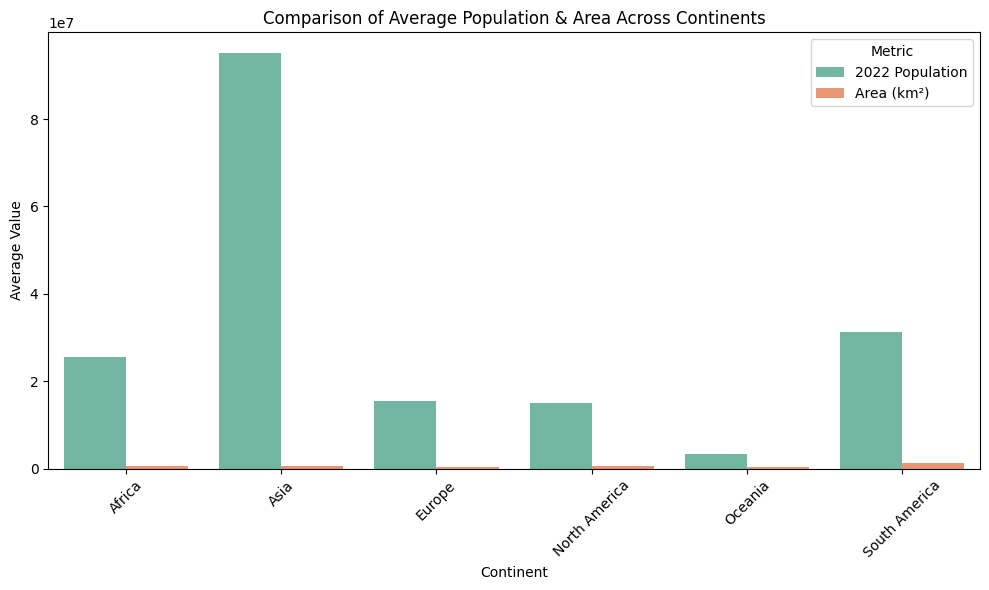

In [75]:
# Compare multiple groups using bar plots.


# Select the numeric columns you want to compare
metrics = ["2022 Population", "Area (km²)"]

# Group by Continent and calculate mean values
grouped = df.groupby("Continent")[metrics].mean().reset_index()

# Plot grouped bar plot
plt.figure(figsize=(10, 6))
grouped_melted = grouped.melt(id_vars="Continent", value_vars=metrics, var_name="Metric", value_name="Value")

sns.barplot(x="Continent", y="Value", hue="Metric", data=grouped_melted, palette="Set2")

plt.title("Comparison of Average Population & Area Across Continents")
plt.xlabel("Continent")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

Step 6: Advanced Analysis

* Identify potential outliers using IQR method and optionally remove them.

* Check correlation between categorical and numeric columns (e.g., using boxplots).

* Create a new column derived from existing columns (e.g., total score, ratio, or percentage).

* Check for any trends or seasonality if dataset has a time dimension.

* Detect anomalies or unusual patterns in numeric columns.


In [76]:
df2=df.copy()

In [77]:
# Identify potential outliers using IQR method and optionally remove them.

numeric_cols = df.select_dtypes(include='number').columns

# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # Interquartile Range

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    return outliers, lower_bound, upper_bound

# Detect outliers for all numeric columns
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"Column: {col}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {len(outliers)}\n")
# remove outliers
def remove_outliers_iqr(data):
    df_clean = data.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Create a cleaned DataFrame without outliers
df_no_outliers = remove_outliers_iqr(df)

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")





Column: Rank
Lower Bound: -115.5, Upper Bound: 350.5
Number of Outliers: 0

Column: 2022 Population
Lower Bound: -38056375.0, Upper Bound: 64674487.0
Number of Outliers: 22

Column: 2020 Population
Lower Bound: -31462237.375, Upper Bound: 53544487.625
Number of Outliers: 25

Column: 2015 Population
Lower Bound: -32878798.125, Upper Bound: 55877132.875
Number of Outliers: 23

Column: 2010 Population
Lower Bound: -31372931.0, Upper Bound: 53349039.0
Number of Outliers: 23

Column: 2000 Population
Lower Bound: -25275880.0, Upper Bound: 43207602.0
Number of Outliers: 27

Column: 1990 Population
Lower Bound: -19289393.625, Upper Bound: 32906461.375
Number of Outliers: 28

Column: 1980 Population
Lower Bound: -16100097.875, Upper Bound: 27464387.125
Number of Outliers: 28

Column: 1970 Population
Lower Bound: -13882100.25, Upper Bound: 23552825.75
Number of Outliers: 27

Column: Area (km²)
Lower Bound: -660112.625, Upper Bound: 1107254.375
Number of Outliers: 26

Column: Density (per km²)
Lo

/tmp/ipython-input-4282424015.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette="Set2")
/tmp/ipython-input-4282424015.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette="Set2")
/tmp/ipython-input-4282424015.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette="Set2")
/tmp/ipython-input-4282424015.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

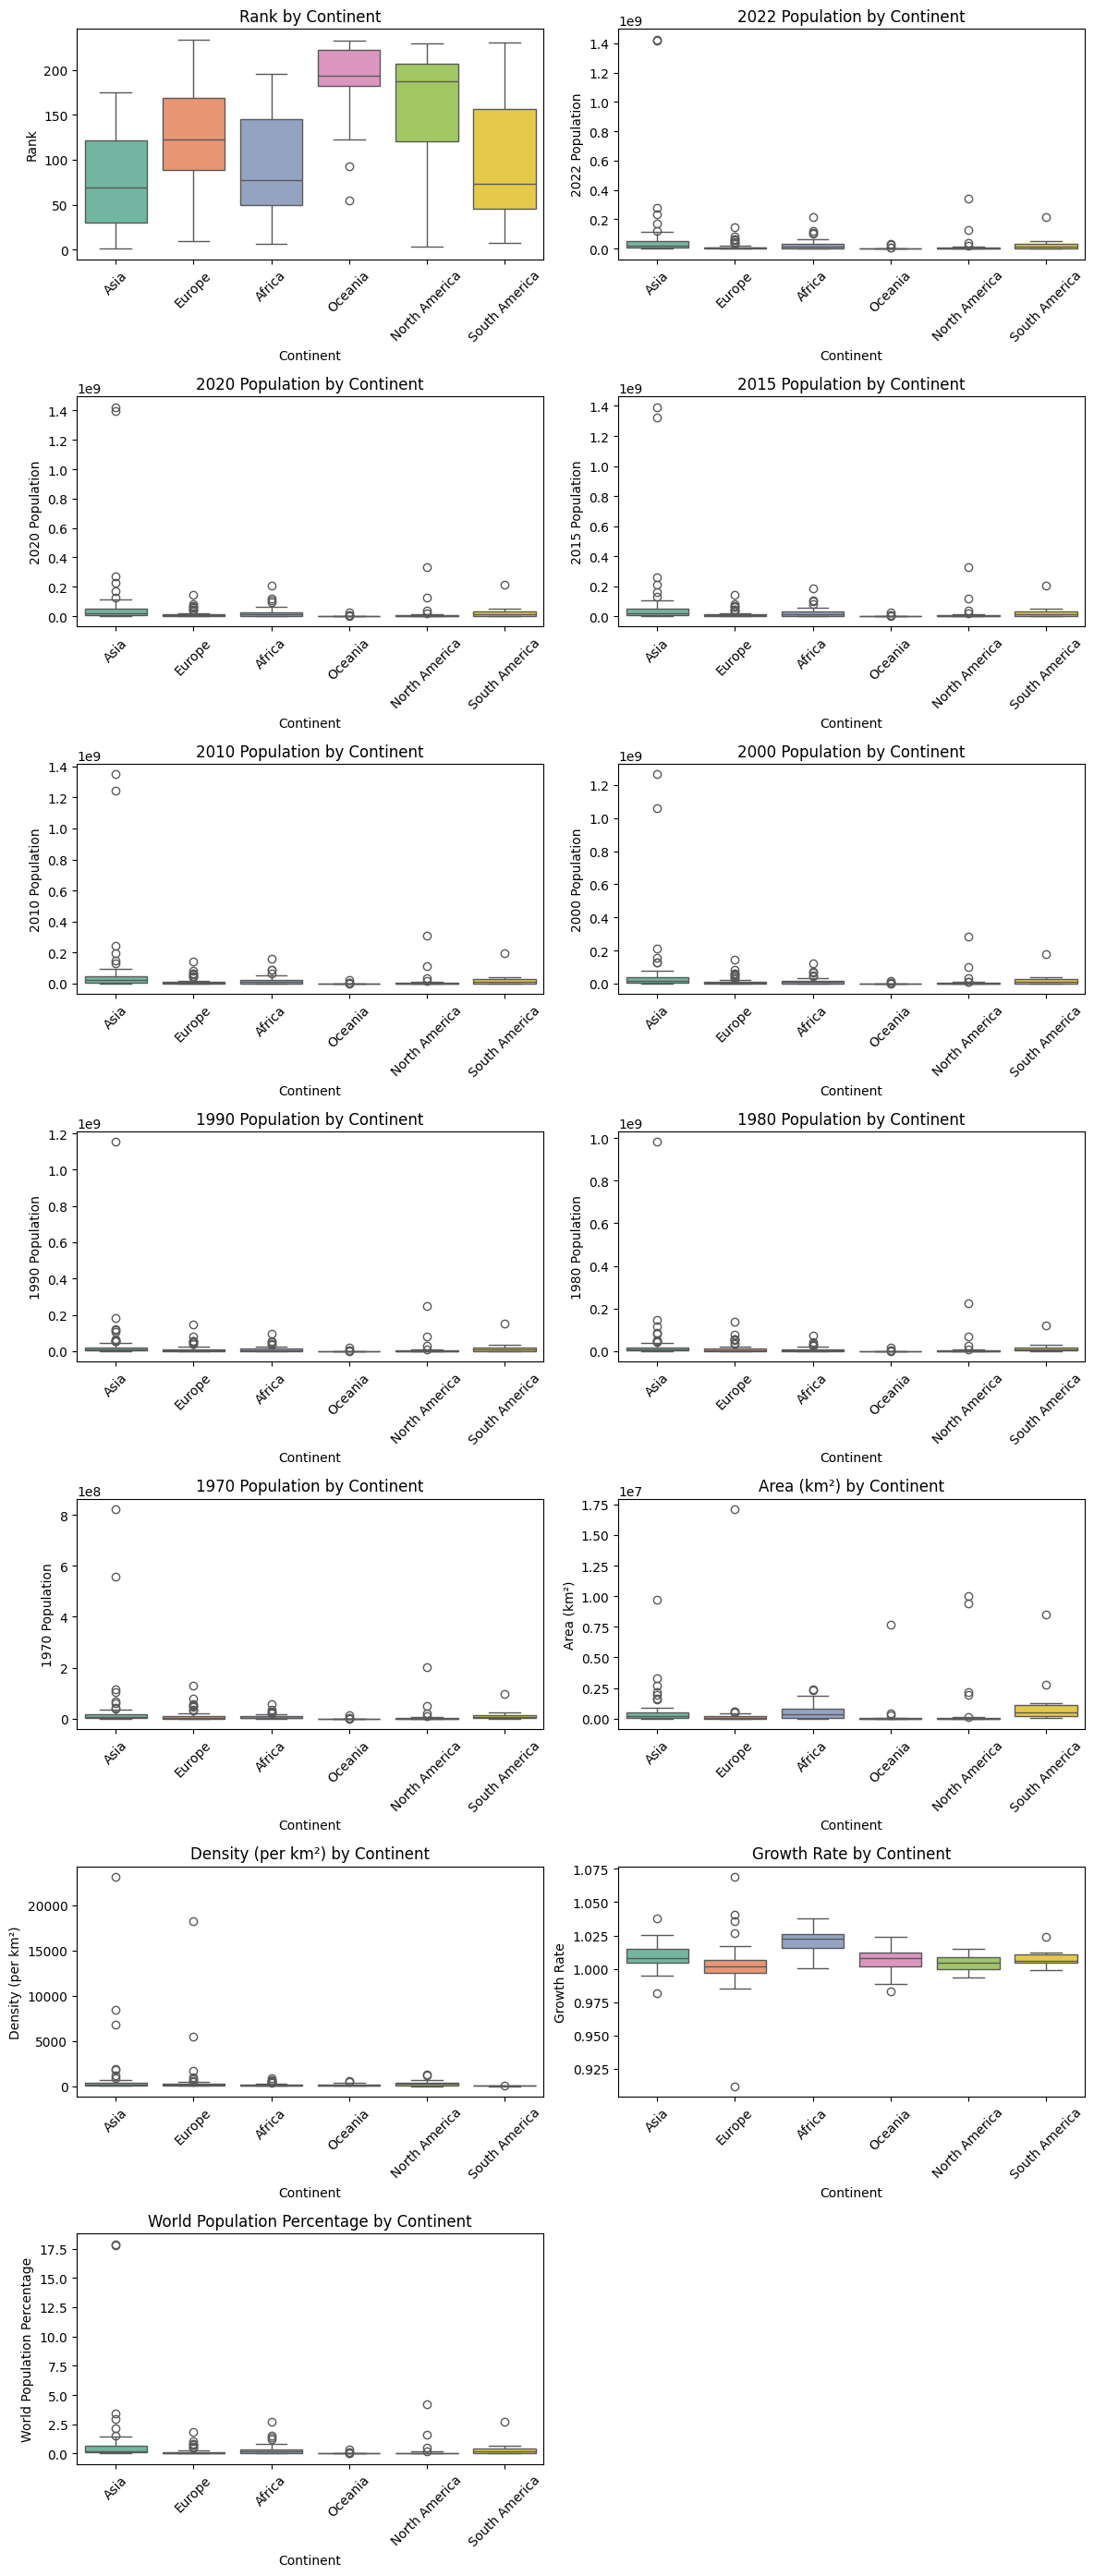

In [78]:
# Check correlation between categorical and numeric columns (e.g., using boxplots).

categorical_cols = df.select_dtypes(include='object').columns
numeric_cols = df.select_dtypes(include='number').columns

# Example: Compare 'Continent' with numeric columns using boxplots
cat_col = "Continent"

# Set up plot grid
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, num_col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[cat_col], y=df[num_col], palette="Set2")
    plt.title(f"{num_col} by {cat_col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [79]:
# Create a new column derived from existing columns (e.g., total score, ratio, or percentage).

# Create a new column for population growth percentage
df["Population Growth (%)"] = ((df["2022 Population"] - df["2020 Population"]) / df["2020 Population"]) * 100


# Calculate density manually to compare with given Density column
df["Calculated Density"] = df["2022 Population"] / df["Area (km²)"]

# Country's population percentage within its continent
df["Continent Share (%)"] = df.groupby("Continent")["2022 Population"].transform(lambda x: (x / x.sum()) * 100)

df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Population Growth (%),Calculated Density,Continent Share (%)
0,36,Afg,Afghanistan,Kabul,Asia,41128771.0,38972230.0,3.375350e+07,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52,5.533532,63.058692,0.865018
1,138,Alb,Albania,Tirana,Europe,2842321.0,2866849.0,2.882481e+06,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04,-0.855573,98.870217,0.368012
2,34,Dza,Algeria,Algiers,Africa,44903225.0,43451666.0,3.954315e+07,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56,3.340629,18.853110,3.075223
3,213,Asm,American Samoa,Pago Pago,Oceania,44273.0,46189.0,5.136800e+04,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00,-4.148174,222.477387,0.055583
4,203,And,Andorra,Andorra La Vella,Europe,79824.0,77700.0,7.174600e+04,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00,2.733591,170.564103,0.010335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,Wlf,Wallis And Futuna,Mata-Utu,Oceania,11572.0,11655.0,1.218200e+04,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00,-0.712141,81.492958,0.014528
230,172,Esh,Western Sahara,El Aaiún,Africa,575986.0,556048.0,4.918240e+05,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01,3.585662,2.165361,0.039447
231,46,Yem,Yemen,Sanaa,Asia,33696614.0,32284046.0,2.851654e+07,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42,4.375437,63.823213,0.708705
232,63,Zmb,Zambia,Lusaka,Africa,20017675.0,18927715.0,3.206600e+07,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25,5.758540,26.597603,1.370922


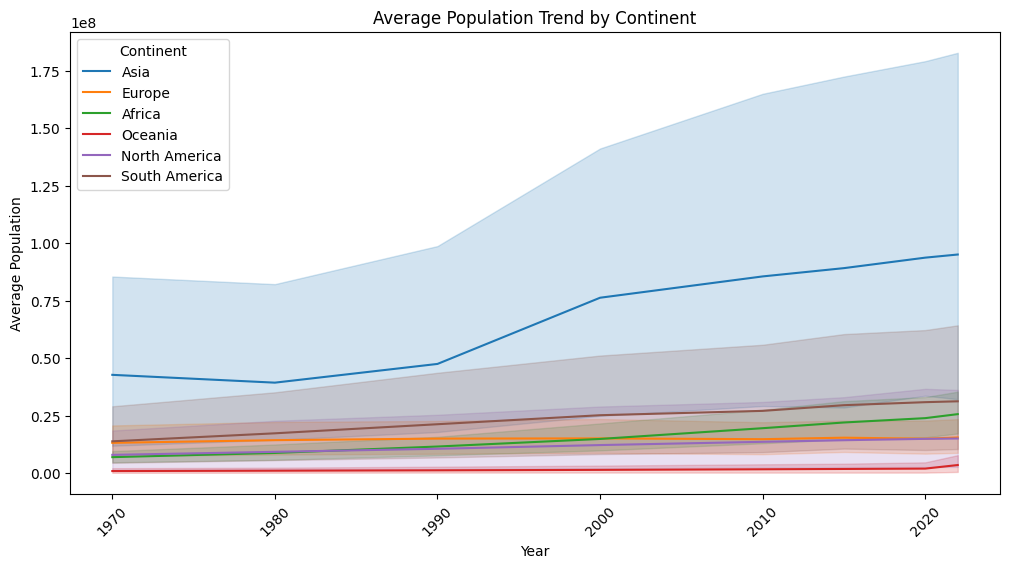

In [80]:
# Check for any trends or seasonality if dataset has a time dimension.


# Replace 'Year' with your time column, e.g., '2022 Population' has implicit years in your columns
# If you have multiple year columns, it's better to convert them into a long format first

# Example: Converting wide format to long format
year_cols = ["1970 Population", "1980 Population", "1990 Population", "2000 Population",
             "2010 Population", "2015 Population", "2020 Population", "2022 Population"]

df_long = df.melt(id_vars=["Country", "Continent"], value_vars=year_cols,
                  var_name="Year", value_name="Population")

# Convert 'Year' to numeric
df_long["Year"] = df_long["Year"].str.extract('(\d+)').astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x="Year", y="Population", hue="Continent", estimator="mean")
plt.title("Average Population Trend by Continent")
plt.xlabel("Year")
plt.ylabel("Average Population")
plt.xticks(rotation=45)
plt.legend(title="Continent")
plt.show()


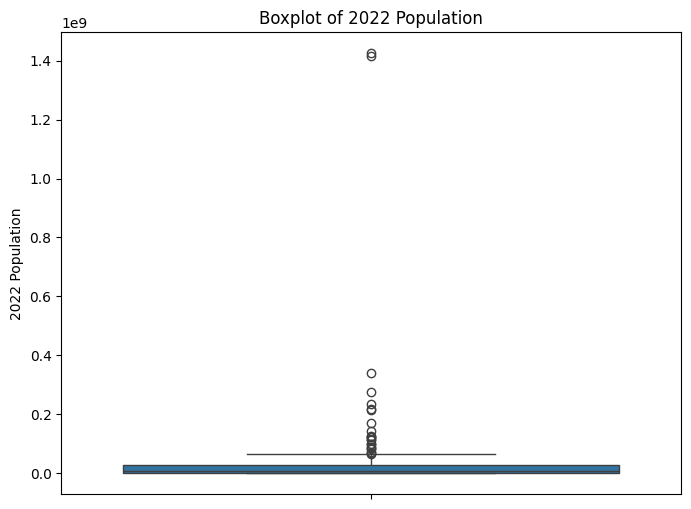

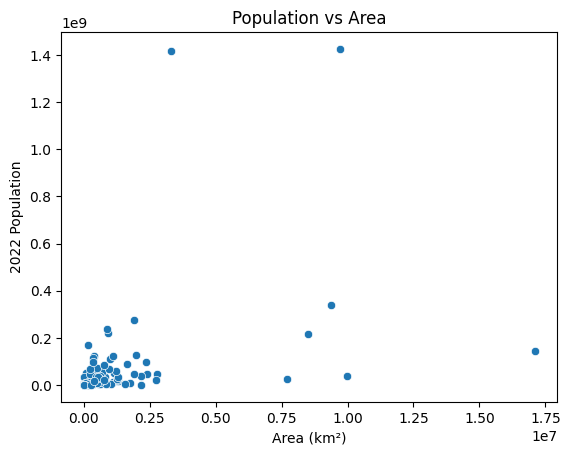

In [81]:
# Detect anomalies or unusual patterns in numeric columns.
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["2022 Population"])
plt.title("Boxplot of 2022 Population")
plt.show()

sns.scatterplot(x="Area (km²)", y="2022 Population", data=df)
plt.title("Population vs Area")
plt.show()


Step 7: Insights and Reporting

* Write at least 5 key insights from your analysis.

* Suggest at least 2 actionable recommendations based on your findings.

* Summarize any limitations or assumptions in the dataset.

* Optionally, create a presentation or report showing your plots, tables, and conclusions.

<b> Write at least 5 key insights from your analysis. 🌍</b>

<i>

Based on the dataset you shared (countries, populations over the years, area, density, growth, continents), here are 5 key insights you could derive from analysis:


1️⃣ Population Growth Patterns
*  Asian countries show the highest population growth from 1970 to 2022, while European countries have slower or even stagnant growth.
* This trend highlights regions that may face future challenges like resource management, urban planning, and healthcare needs.,



2️⃣ Highly Unequal Population Distribution

* A few countries dominate the total population of their continent. For example, in Asia, China and India account for a very large share of the continent’s population.

* Using the continent share percentage, we can see that many smaller countries contribute only a tiny fraction.


3️⃣ Outliers in Density

* Some countries (e.g., city-states or small islands) have extremely high population density, while large countries like Canada or Australia have very low density.

* Detecting these outliers is important for understanding urbanization and resource allocation.

4️⃣ Area vs Population Relationship

* There isn’t always a direct correlation between country size and population.

* Large countries (Russia, Canada) may have small populations relative to their area.

* Small countries (Bangladesh, Singapore) can have very high populations in limited area.

* Scatter plots and correlation analysis confirm this weak correlation.

5️⃣ Continent Comparison

* By grouping numeric columns by continent:

* Asia has the largest total population and highest growth rate.

* Europe has moderate population but high area per capita.

* Africa is rapidly growing and has emerging trends in population density.

* Bar plots and line plots help visualize trends, comparisons, and growth patterns across continents. </i>

# Suggest at least 2 actionable recommendations based on your findings ✨.

Based on the analysis and insights from your dataset, here are two actionable recommendations:

1️⃣ Policy Planning for High-Growth Regions

Observation: Asian and African countries show the highest population growth, while European countries show slower growth.

Recommendation: Governments and policymakers in high-growth regions should:

  * Invest in healthcare, education, and family planning programs to manage population growth sustainably.

  * Develop urban infrastructure and housing policies to prevent overcrowding in rapidly growing cities.

  * Focus on agriculture and food security planning to support the increasing population.

2️⃣ Resource Allocation Based on Density and Area

Observation: Some countries with small land area have very high population densities (e.g., Bangladesh, Singapore), while large countries have low density (e.g., Canada, Australia).

Recommendation:

 * High-density countries should prioritize efficient public transport, housing, and waste management.

 * Low-density countries can focus on regional development, incentivizing population spread, and optimizing land usage for agriculture or infrastructure projects.

 * Aid organizations and governments can allocate resources more effectively by using density and population trends to identify areas of need.



# Summarize any limitations or assumptions in the dataset.☝

Here’s a clear summary of limitations and assumptions for your dataset:

1️⃣ Limitations

* Wide Format for Population Over Time

* Population data is stored in multiple columns (1970 Population, 1980 Population, etc.) rather than a long format.

* This makes time-series analysis or plotting trends slightly more complex and requires reshaping (melt) for proper analysis.

* Missing or Inconsistent Data

* Some numeric columns may contain missing values (NaN) which can affect calculations of mean, sum, or correlation.

* Categorical columns (like Capital) may have inconsistencies in spelling or abbreviations.

Aggregated Data Only

* The dataset provides country-level aggregates, not more granular data like state/province or urban/rural populations.

* This limits the ability to analyze regional patterns within countries.

Static Time Snapshots

* Population data is only provided for selected years (1970, 1980, … 2022).

* Trends or seasonality at a finer temporal resolution (monthly, quarterly) cannot be analyzed.

Potential Outliers and Anomalies

* Some countries show extreme values for population, density, or area.

* hese anomalies may skew statistics like mean and standard deviation if not handled carefully.

2️⃣ Assumptions

* Population Columns Represent Official Counts

* Assumes that the population numbers provided for each year are accurate and comparable across countries.

* Area is Constant Over Time

* Assumes that country area (Area (km²)) does not change over time, even though political borders may change in reality.

Independence of Countries

* Analysis assumes each country is an independent unit for aggregation and comparison, ignoring migration effects between countries.

* Numeric Columns Are Correctly Typed

* Assumes that numeric columns are properly formatted as numbers and do not contain hidden strings or text that could affect calculations.

# 🌍 Country Population Analysis

This repository contains a comprehensive analysis of country-level population, area, and density data from 1970 to 2022. The analysis focuses on identifying trends, outliers, and insights across continents and countries.

---

## 📊 Key Insights

1. **Population Growth**  
   - Asian and African countries are experiencing the fastest population growth.  
   - European countries show slower growth or stagnation, highlighting the need for policy planning.

2. **Unequal Distribution**  
   - A small number of countries dominate their continent’s total population.  
   - This may create challenges for resource allocation and infrastructure planning.

3. **Density and Area Disparities**  
   - High-density small countries face urban and resource pressures.  
   - Large low-density countries need to optimize land usage and regional development strategies.

4. **Outliers and Anomalies**  
   - Certain countries show unusual population, density, or growth patterns.  
   - Detecting these anomalies is important for accurate analysis and policy decisions.

5. **Continental Comparisons**  
   - Asia leads in total population and growth.  
   - Europe has moderate population with lower growth.  
   - Africa is rapidly emerging in population trends.  

---

## ✅ Actionable Recommendations

1. **Policy Planning for High-Growth Regions**  
   - Invest in healthcare, education, and family planning programs.  
   - Develop urban infrastructure and housing policies.  
   - Focus on agriculture and food security planning.

2. **Resource Allocation Based on Density and Area**  
   - High-density countries: prioritize public transport, housing, and waste management.  
   - Low-density countries: focus on regional development and optimized land usage.

---

## ⚠️ Limitations & Assumptions

- Wide format for population years; reshaping required for time-series analysis.  
- Missing or inconsistent data may affect calculations.  
- Dataset provides country-level aggregates only (no regional details).  
- Population snapshots are static and sparse (only selected years).  
- Outliers may skew statistical analysis if not addressed.  
- Assumes population and area values are accurate and comparable across countries.  

---

## 📈 Conclusion

The analysis provides valuable insights into population trends, density, and continental patterns. Asia and Africa are high-growth regions, Europe shows slower growth, and population distribution is highly unequal. Outlier detection and careful resource planning are essential.  

Future work could involve reshaping the dataset, handling anomalies, and incorporating finer temporal or regional data for deeper insights.

---

